In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import dotenv
import os
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
#Titanic

In [3]:
dotenv_path = dotenv.find_dotenv()
dotenv.load_dotenv(dotenv_path)
username = os.getenv("username2")
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbname")
connection_str = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"
engine = create_engine(connection_str)
query = "SELECT * FROM titanic"
titanic = pd.read_sql_query(query, engine)
titanic.tail()

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,,S,0,10-4-1912
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,1,11-4-1912
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,0,10-4-1912
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,,S,0,10-4-1912
1308,1309,3,"Peter, Master. Michael J",male,0.0,1,1,2668,22.36,,C,1,11-4-1912


In [4]:
titanic['EmbarkDate'] = pd.to_datetime(titanic['EmbarkDate'], format='%d-%m-%Y')

In [5]:
titanic.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PassengerId  1309 non-null   int64         
 1   PClass       1309 non-null   int64         
 2   Name         1309 non-null   object        
 3   Sex          1309 non-null   object        
 4   Age          1309 non-null   float64       
 5   SibSp        1309 non-null   int64         
 6   Parch        1309 non-null   int64         
 7   Ticket       1309 non-null   object        
 8   Fare         1309 non-null   float64       
 9   Cabin        1309 non-null   object        
 10  Embarked     1309 non-null   object        
 11  Survived     1309 non-null   int64         
 12  EmbarkDate   1307 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 498.1 KB


In [6]:
#classi di imbarco
titanic["PClass"].value_counts(dropna=False)

PClass
3    709
1    323
2    277
Name: count, dtype: int64

<Axes: xlabel='PClass', ylabel='count'>

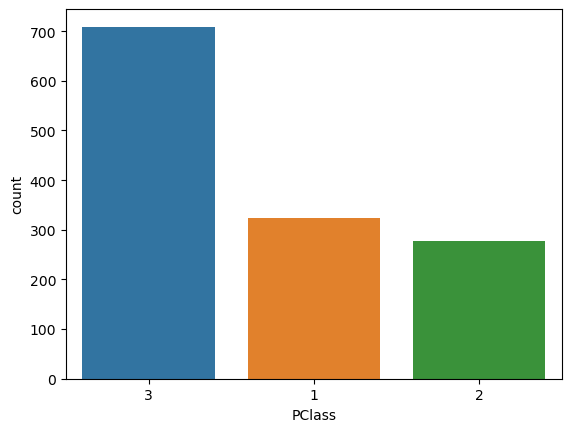

In [7]:
sns.countplot(data=titanic, x="PClass", order= titanic["PClass"].value_counts().index)

In [8]:
#survived

<Axes: xlabel='Survived', ylabel='count'>

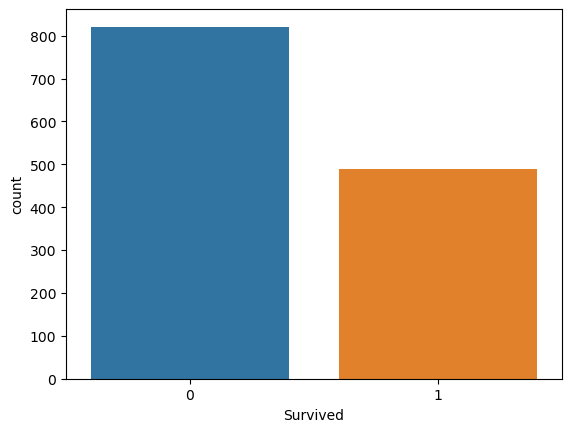

In [9]:
sns.countplot(data=titanic, x="Survived", order= titanic["Survived"].value_counts().index)

<Axes: xlabel='Fare', ylabel='Percent'>

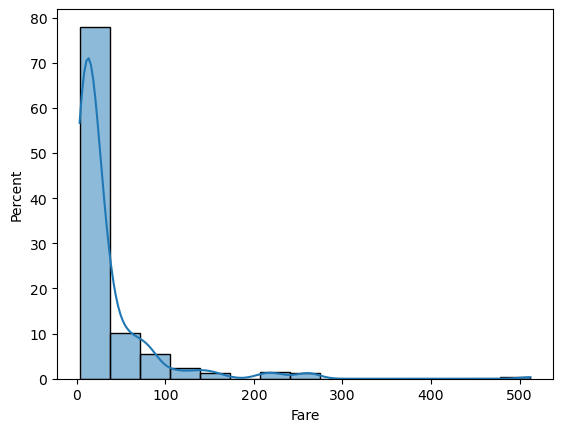

In [10]:
#distribuzione delle tariffe
sns.histplot(data= titanic.query("Fare > 0"), x="Fare", bins= 15, kde = True, stat= "percent")

<Axes: xlabel='PClass', ylabel='Age'>

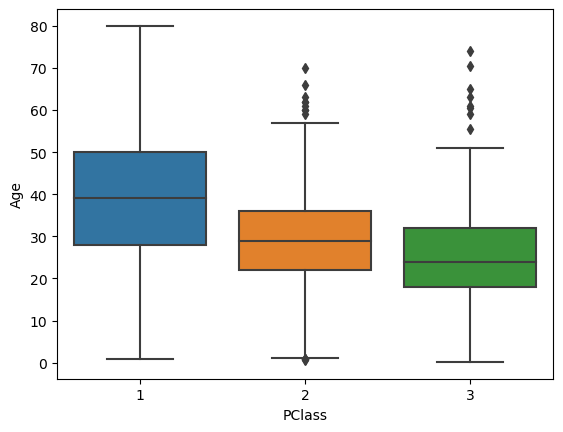

In [11]:
#distribuzione passeggeri
sns.boxplot(data = titanic.query("Age > 0"), y="Age", x="PClass")

<Axes: xlabel='PClass', ylabel='Age'>

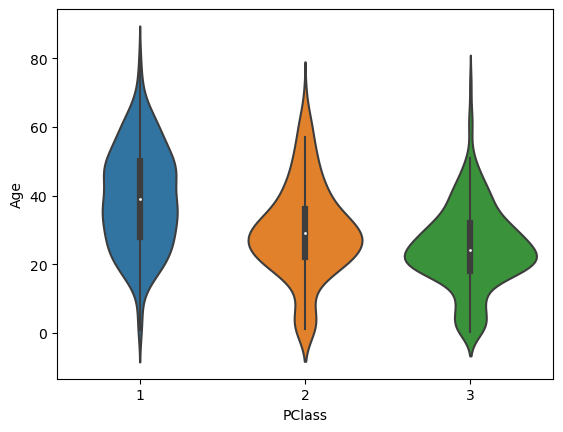

In [12]:
sns.violinplot(data = titanic.query("Age > 0"), y="Age", x="PClass")

<Axes: ylabel='Fare'>

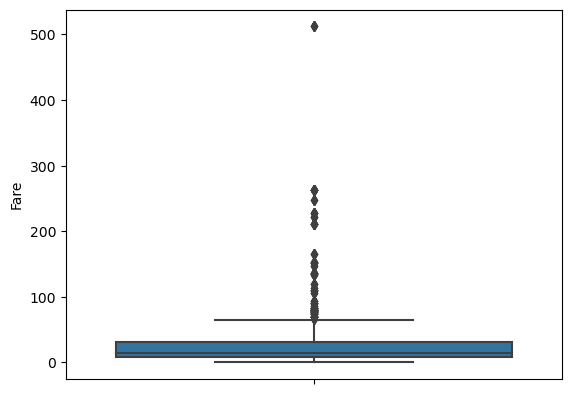

In [13]:
#Fare & Survived
sns.boxplot(data = titanic, y="Fare")

<Axes: ylabel='Survived'>

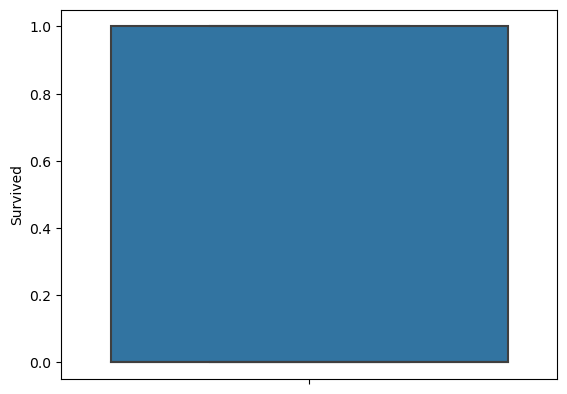

In [14]:
sns.boxplot(data = titanic, y="Survived")

In [15]:
#Stockdata
stockdata = pd.read_csv("stockdata.csv", parse_dates=["Date"])

In [16]:
stockdata.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   MSFT    2306 non-null   float64       
 1   IBM     2306 non-null   float64       
 2   SBUX    2306 non-null   float64       
 3   AAPL    2306 non-null   float64       
 4   GSPC    2306 non-null   float64       
 5   Date    2306 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 108.2 KB


<Axes: xlabel='Date', ylabel='AAPL'>

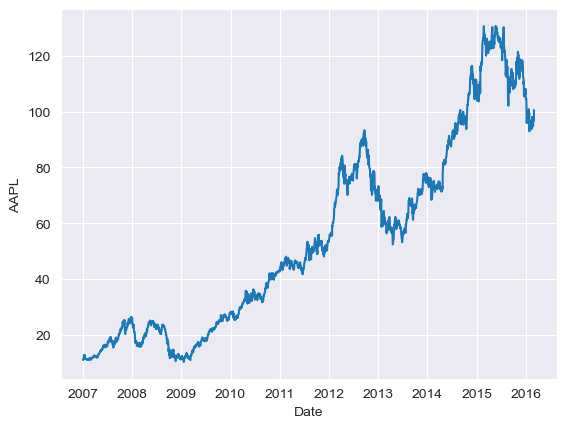

In [17]:
#Visualizziamo l'andamento delle azioni della Apple ("AAPL")
sns.set_style("darkgrid")

sns.lineplot(data = stockdata, x="Date", y="AAPL")

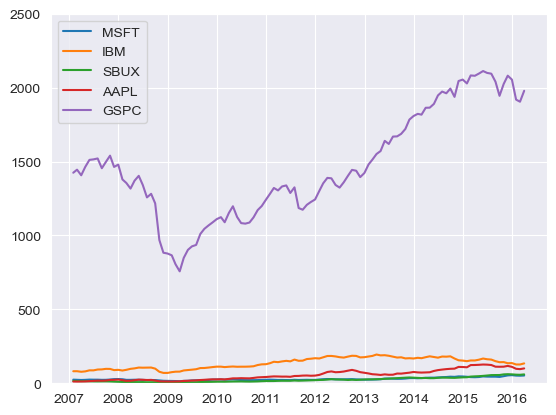

In [18]:
#Visualizziamo l'andamento di tutte le azioni del dataset
std = stockdata.set_index("Date").resample("M").mean()
fig, ax = plt.subplots()
ax.plot(std)
ax.set_ylim(0,2500)
ax.legend(std.columns)

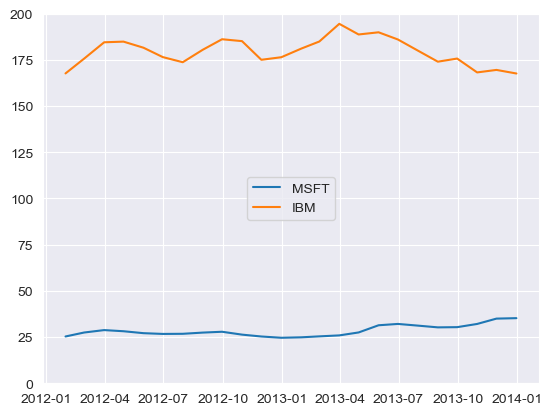

In [19]:
#Visualizziamo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013
msft_ibm = std.loc["2012":"2013", ["MSFT", "IBM"]]
fig, ax = plt.subplots()
ax.plot(msft_ibm)
ax.set_ylim(0,200)
ax.legend(msft_ibm.columns, loc ="center")

<Axes: xlabel='MSFT', ylabel='Percent'>

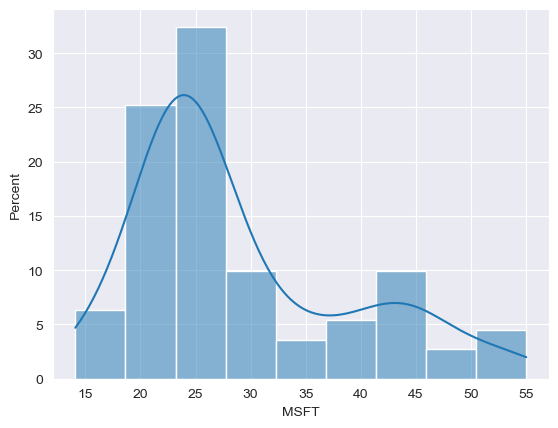

In [20]:
#Con un istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso
sns.histplot(data = std.loc[:,"MSFT"], stat = "percent", kde =True)

In [21]:
#metalbands
metal = pd.read_csv("metal_bands_2017.csv", encoding="latin-1", na_values="-")
metal.head()

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975.0,United Kingdom,NaN,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990.0,Sweden,1990.0,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981.0,USA,NaN,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983.0,USA,1983.0,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988.0,Sweden,NaN,Melodic death


In [22]:
metal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5000 non-null   int64  
 1   band_name   5000 non-null   object 
 2   fans        5000 non-null   int64  
 3   formed      4996 non-null   float64
 4   origin      4992 non-null   object 
 5   split       2785 non-null   float64
 6   style       5000 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 273.6+ KB


In [23]:
metal["band_name"].nunique()

4949

<Axes: xlabel='fans', ylabel='Count'>

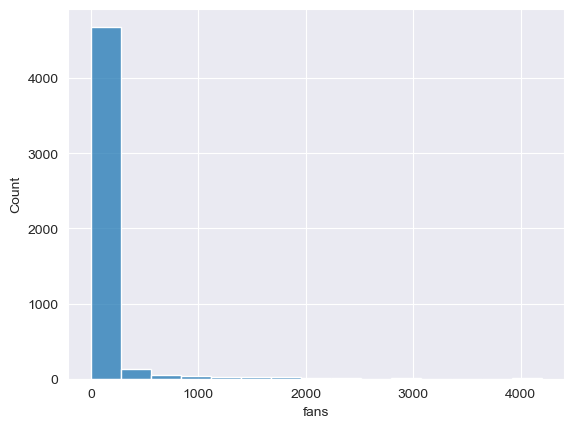

In [24]:
sns.histplot(data=metal, x="fans", bins = 15)


In [25]:
metal["fans"].value_counts().sort_index()

fans
0        27
1       491
2       373
3       322
4       247
       ... 
3054      2
3105      2
3712      2
4147      2
4195      2
Name: count, Length: 472, dtype: int64

In [26]:
#Delle band che suonano sia Progressive che Thrash, realizziamo un barplot che mostri quanti fan ci sono in totale rispetto al paese di origine 
#(nota: in questo caso specifico, per accedere alla colonna "style" dovremo usare ["style"] e non .style perché quest'ultimo è un metodo)

In [27]:
mask = ((metal["style"].str.lower().str.contains("progressive")) | 
        (metal["style"].str.lower().str.contains("trash")))

In [28]:
metal_p_t = metal.loc[mask]
metal_p_t.head()

,Unnamed: 0,band_name,fans,formed,origin,split,style
1,1,Opeth,4147,1990.0,Sweden,1990.0,"Extreme progressive,Progressive rock,Progressive"
6,6,Death,2690,1983.0,USA,2001.0,"Progressive death,Death,Progressive thrash"
7,7,Dream Theater,2329,1985.0,USA,1985.0,Progressive
25,25,Amorphis,1528,1990.0,Finland,1990.0,"Death,Melodic death,Folk,Progressive"
27,27,Tool,1506,1988.0,USA,1988.0,"Progressive,Alternative"


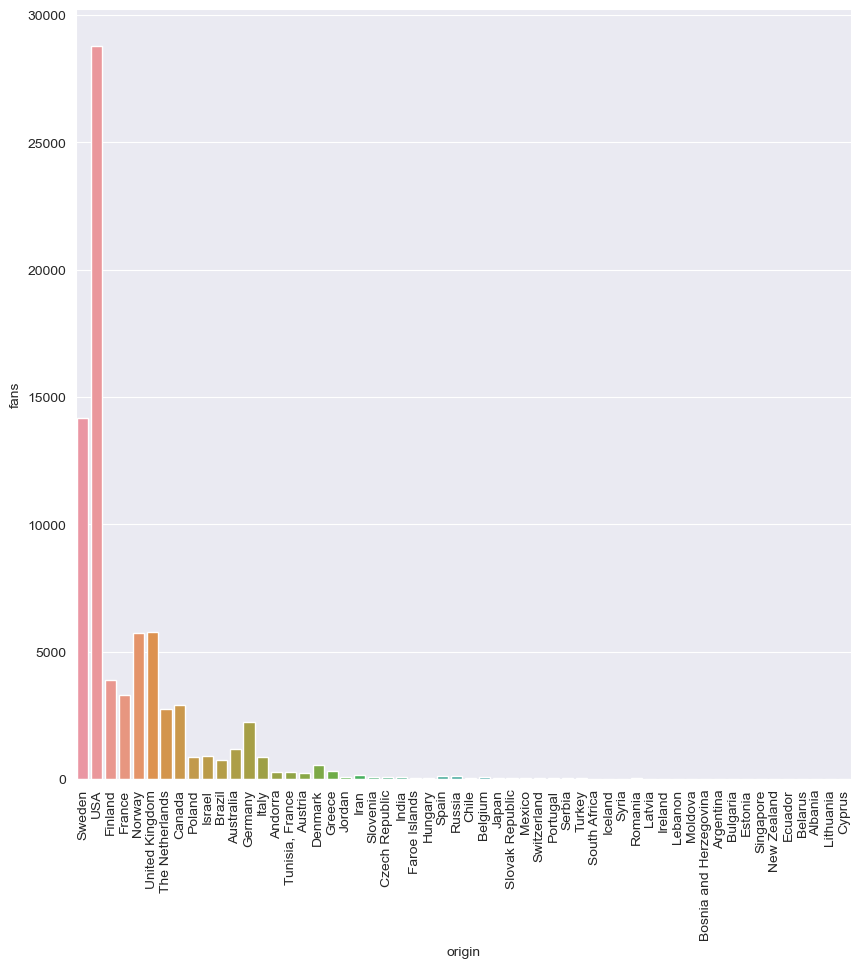

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data= metal_p_t, x="origin", y="fans", estimator=sum, errorbar=None)
plt.xticks(rotation=90)
plt.show();

In [30]:
#Visualizziamo un istogramma delle date di formazione delle band
#(potremo dover convertire in qualche modo questo dato); si nota qualche trend?

In [31]:
metal["year"] = pd.to_datetime(metal["formed"], format="%Y")

<Axes: xlabel='year', ylabel='Percent'>

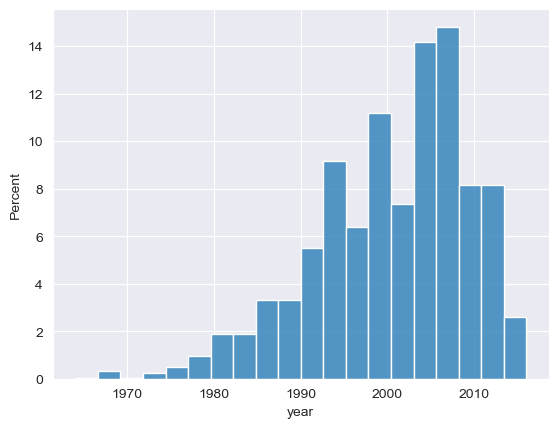

In [32]:
sns.histplot(data=metal, x="year", bins=20, stat="percent")

In [33]:
elections = pd.read_csv("election.csv")

In [34]:
## Con un grafico a barre confrontiamo i voti totali presi dai tre candidati (come somma di tutti i distretti)

In [35]:
elections.head()

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112


In [36]:
df_long = (pd.melt(elections.loc[:,["district", "Coderre", "Bergeron", "Joly"]], id_vars="district", value_vars=["Coderre", "Bergeron", "Joly"], 
                   var_name="Candidate", value_name="Votes"))
df_long

,district,Candidate,Votes
0,101-Bois-de-Liesse,Coderre,2481
1,102-Cap-Saint-Jacques,Coderre,2525
2,11-Sault-au-Récollet,Coderre,3348
3,111-Mile-End,Coderre,1734
4,112-DeLorimier,Coderre,1770
...,...,...,...
169,82-Ovide-Clermont,Joly,1051
170,91-Claude-Ryan,Joly,423
171,92-Joseph-Beaubien,Joly,592
172,93-Robert-Bourassa,Joly,419


<Axes: xlabel='Candidate', ylabel='Votes'>

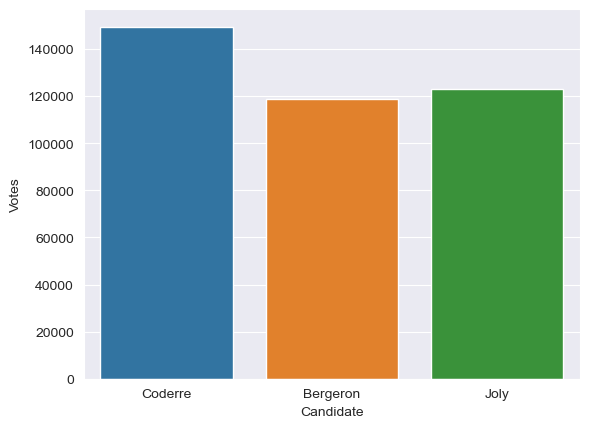

In [37]:
sns.barplot(data=df_long, x="Candidate", y="Votes", estimator=sum, errorbar=None)

In [ ]:
# Con un grafico a barre confrontiamo il numero di votanti per ogni distretto


In [41]:
ordine_plot = elections.groupby("district_id")["total"].sum().sort_values().index

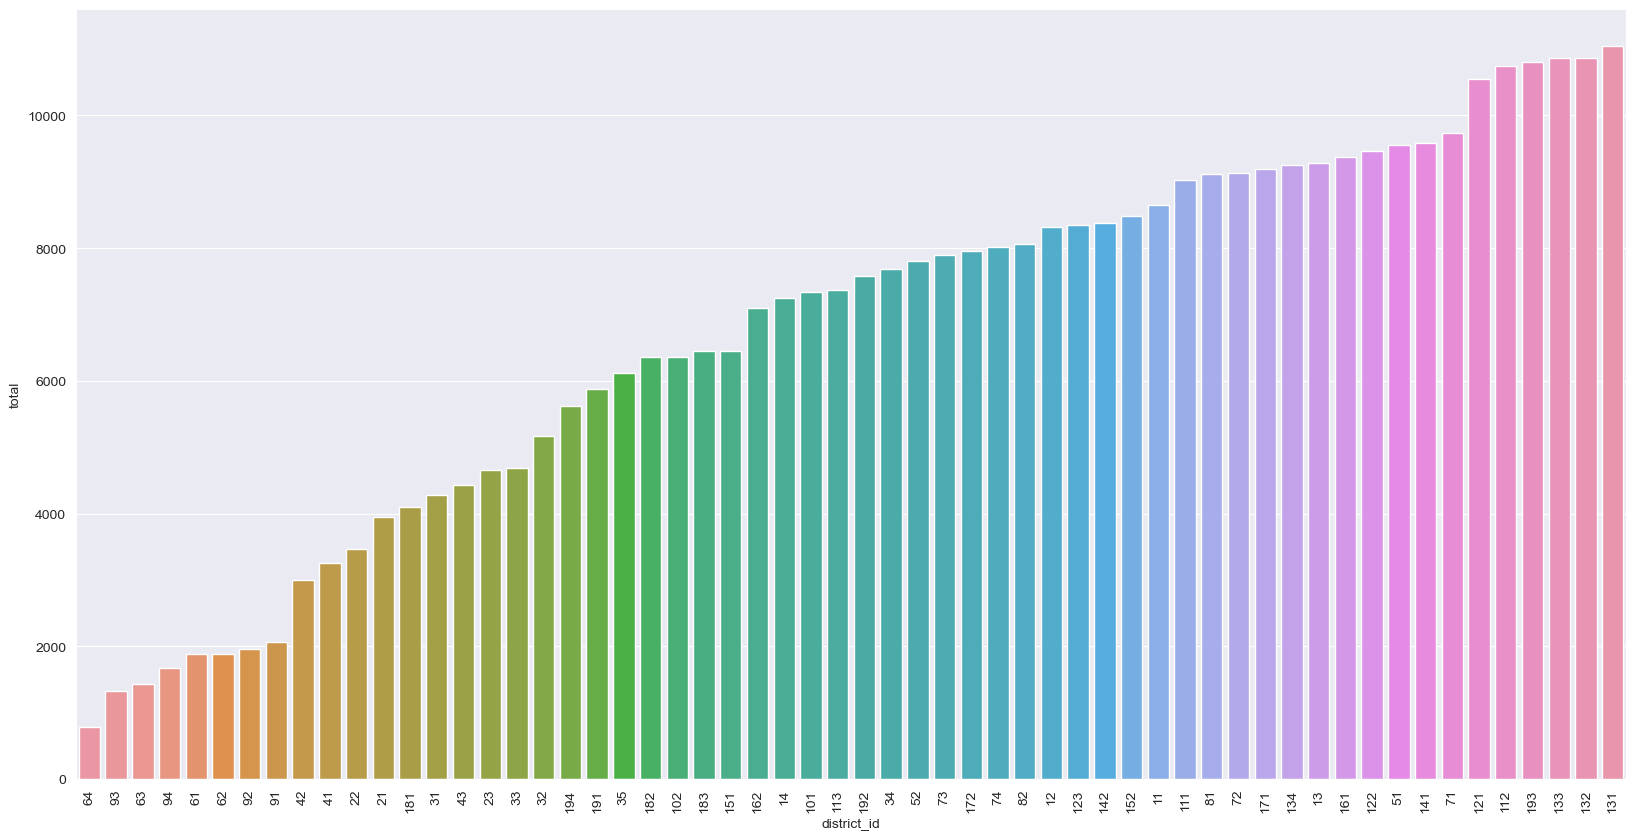

In [44]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=elections, x="district_id", y="total", estimator=sum, order=ordine_plot)
plt.xticks(rotation=90)
plt.show();

In [47]:
df_long2 = (pd.melt(elections.loc[:,["district", "Coderre", "Bergeron", "Joly", "district_id"]], id_vars=["district","district_id"], value_vars=["Coderre", "Bergeron", "Joly"], 
                   var_name="Candidate", value_name="Votes"))
df_long2

,district,district_id,Candidate,Votes
0,101-Bois-de-Liesse,101,Coderre,2481
1,102-Cap-Saint-Jacques,102,Coderre,2525
2,11-Sault-au-Récollet,11,Coderre,3348
3,111-Mile-End,111,Coderre,1734
4,112-DeLorimier,112,Coderre,1770
...,...,...,...,...
169,82-Ovide-Clermont,82,Joly,1051
170,91-Claude-Ryan,91,Joly,423
171,92-Joseph-Beaubien,92,Joly,592
172,93-Robert-Bourassa,93,Joly,419


In [52]:
df_top4_districts = df_long2.loc[df_long2['district_id'] <= 14]

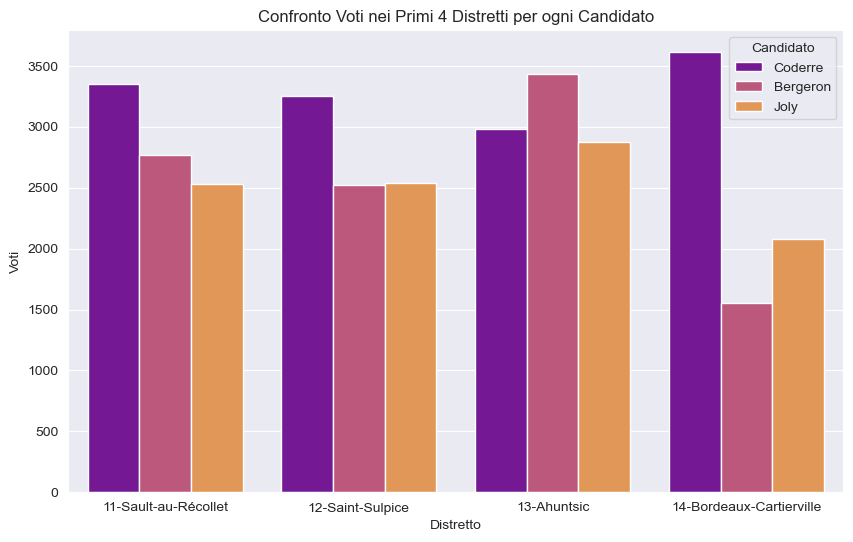

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df_top4_districts, x="district", y="Votes", hue="Candidate", estimator=sum, palette="plasma")

plt.title("Confronto Voti nei Primi 4 Distretti per ogni Candidato")
plt.xlabel("Distretto")
plt.ylabel("Voti")
plt.legend(title="Candidato")

plt.show();

In [61]:
nyc = pd.read_csv("party_in_nyc.csv")
nyc

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
...,...,...,...,...,...,...,...,...
225409,2016-12-31 23:53:57,2017-01-01 00:01:41,Store/Commercial,10003.0,NEW YORK,MANHATTAN,40.730073,-73.986585
225410,2016-12-31 23:55:01,2017-01-01 02:05:06,Residential Building/House,10032.0,NEW YORK,MANHATTAN,40.833144,-73.944617
225411,2016-12-31 23:56:20,2017-01-01 13:34:00,Residential Building/House,11104.0,SUNNYSIDE,QUEENS,40.743662,-73.923067
225412,2016-12-31 23:56:41,2017-01-01 03:49:12,Residential Building/House,10040.0,NEW YORK,MANHATTAN,40.858447,-73.929279


In [65]:
#chiamate per ogni città e tipo di locale
nyc_pivot = nyc.pivot_table(index="City", columns="Location Type", aggfunc="count", fill_value=0 ).droplevel(0, axis =1)

<Axes: xlabel='Location Type', ylabel='City'>

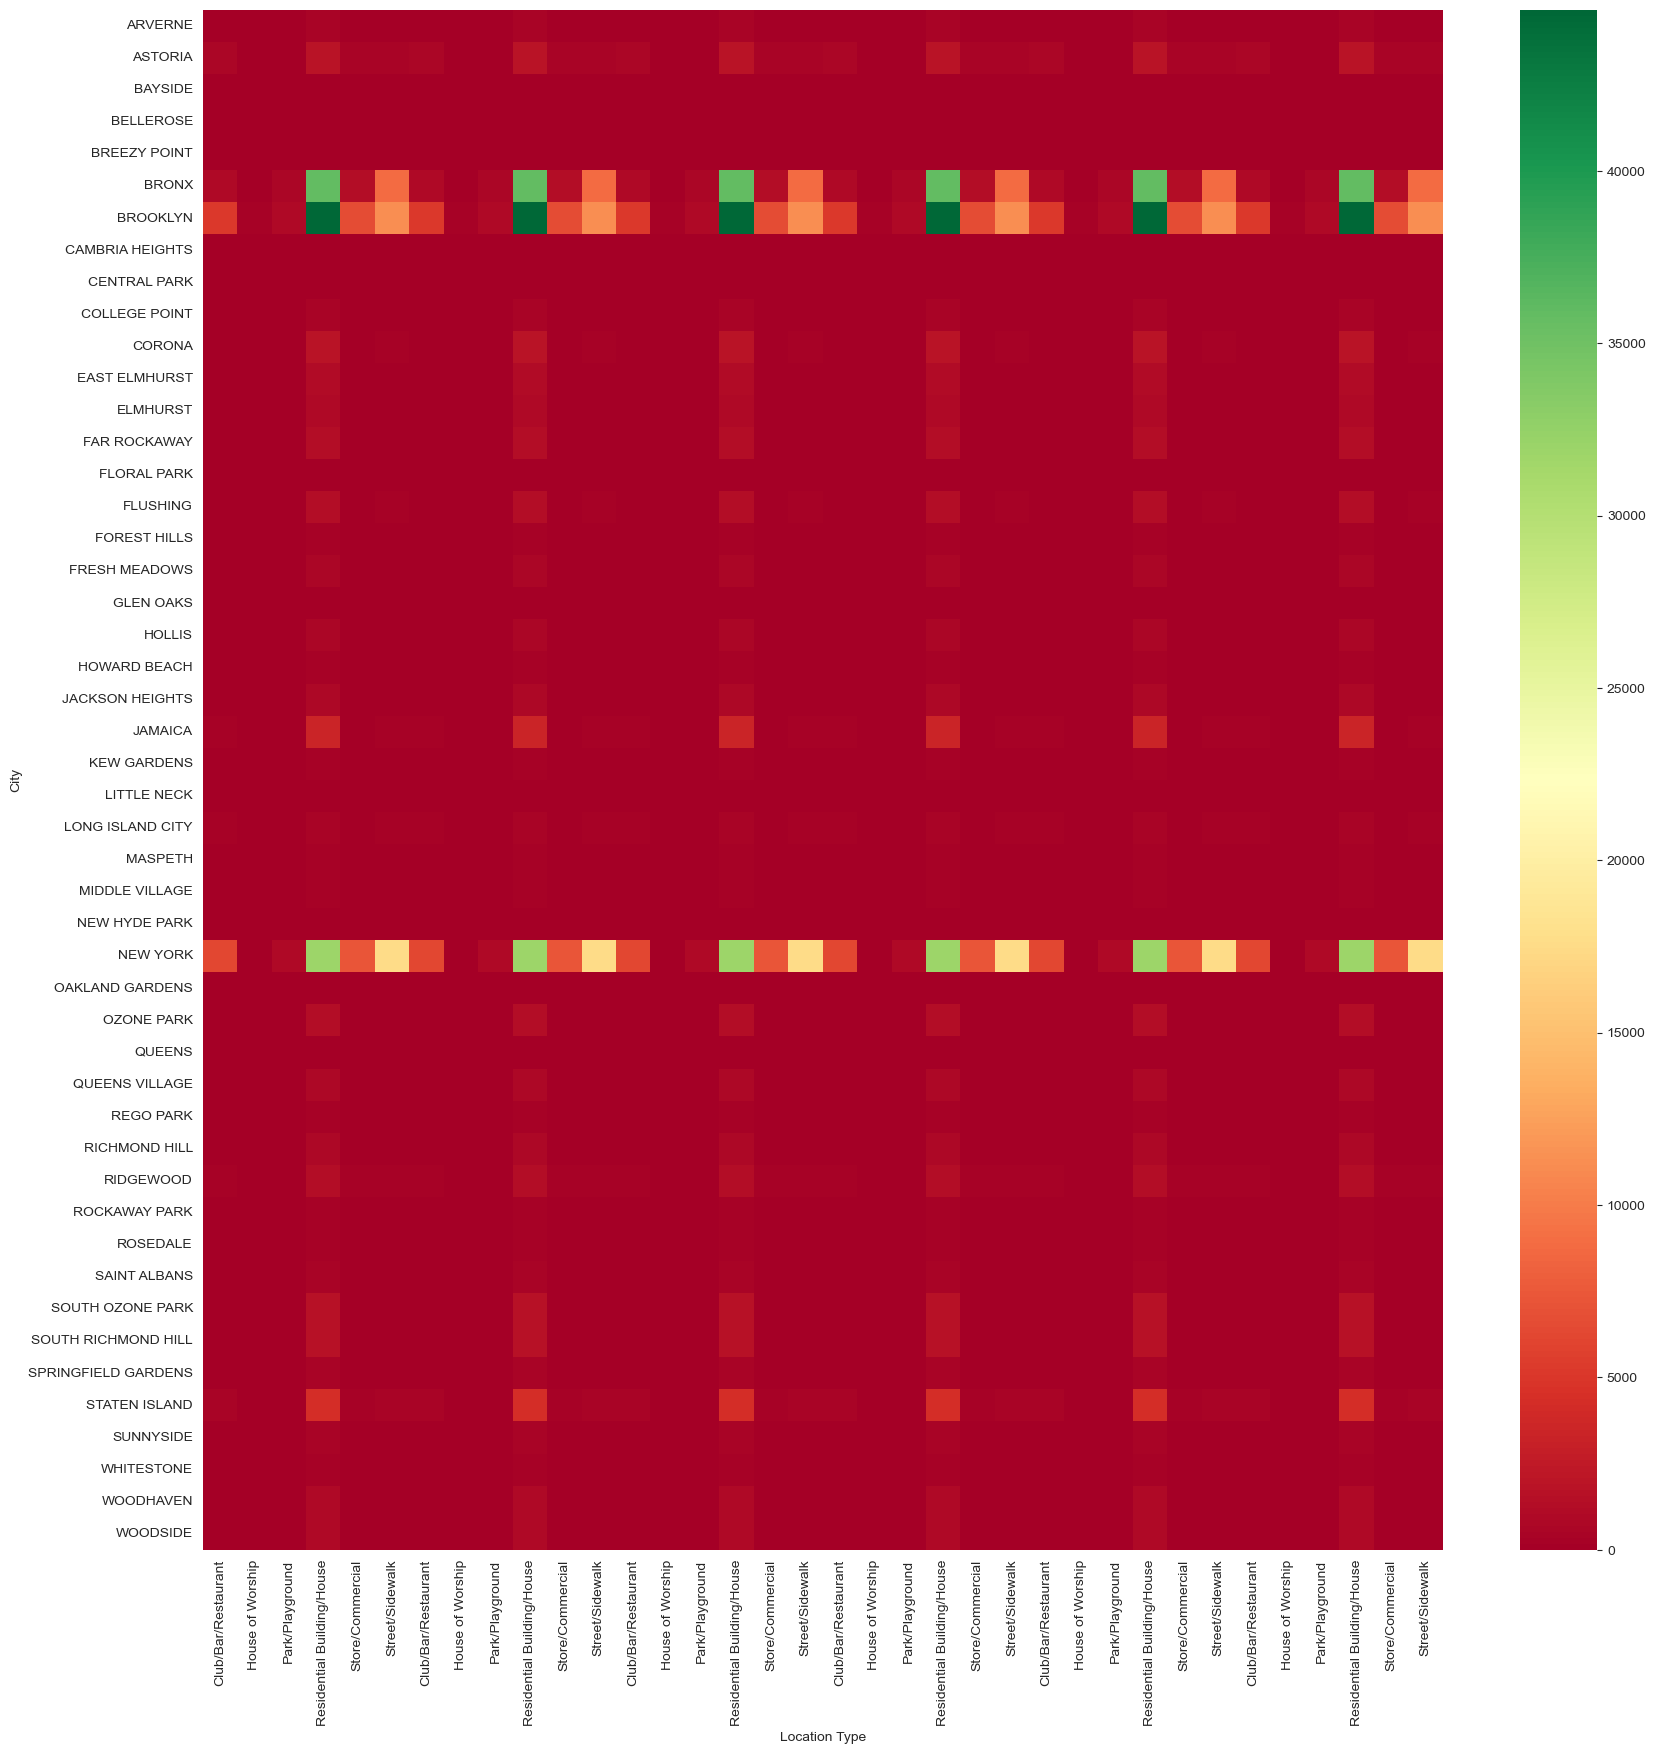

In [71]:
fig, axis = plt.subplots(figsize=(20,20))
sns.heatmap(nyc_pivot, cmap="RdYlGn")

In [73]:
nyc.describe()

,Incident Zip,Latitude,Longitude
count,224424.000000,223946.000000,223946.000000
mean,10720.020992,40.749730,-73.924889
std,576.827879,0.082068,0.063779
min,83.000000,40.498820,-74.251277
25%,10039.000000,40.684648,-73.958245
50%,10469.000000,40.739170,-73.929713
75%,11225.000000,40.829273,-73.893299
max,11697.000000,40.912178,-73.702303
